# Ejercicios de NumPy

In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## Pregunta 1
Crea los siguientes arreglos con los tipos correctos. 
- Un arreglo de $5 \times 5$ cuya diagonal sean $[2.0, 3.0, 4.0, 5.0]$
- Un arreglo de $4 \times 4$ cuyo último renglón sea $[1,2,3,4]$ y el resto sean $0$.

In [6]:
A = np.zeros((5,5))
for i in range(0,5):
    A[i,i]=i+1
A

array([[1., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 4., 0.],
       [0., 0., 0., 0., 5.]])

In [10]:
B = np.zeros((4,4))
B[3,:]=[1,2,3,4]
B

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 2., 3., 4.]])

## Pregunta 2
En este ejercicio realizaremos una [**criba de Eratóstenes**](http://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)
<div class="alert alert-warning">
**Nota**: Ejercicio basado en el presentado en `C4P`.
</div>


(a) Crea un arreglo de booleanos de **shape** `(100,)`, con todos sus elementos `True`.  El índice representa el número.

In [42]:
bool_arr = np.ones((100,), dtype=bool)

(b) "Tacha" los elementos `0` y `1`.

In [43]:
bool_arr[0]= bool_arr[1]=0
bool_arr

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

(c) Para cada entero subsiguiente, tacha sus múltiplos. Una manera de hacerlo es el código que se muestra. Explica que hace el código, sobretodo explica que hace el *slicing*.

In [50]:
N_max = int(np.sqrt(len(bool_arr)))
"""
N_max es el máximo hasta el que debe tomar los múltiplos
"""
"""
Con el slicing, todas las posiciones multiplos de j las hace False
Comienza con 2j para no eliminar el primo
[inicio:final:salto]
No establece final para cubrir todo
"""
for j in range(2, N_max):
    bool_arr[2*j::j] = False

In [51]:
bool_arr

array([False, False,  True,  True, False,  True, False,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False])

(d) Mira la documentacion de `np.nonzero` para imprimir todos los números primos.

In [52]:
np.nonzero?
"""
Devuelve los indices de los elementos que no son cero i.e. False
"""

'\nDevuelve los indices de los elementos que no son cero i.e. False\n'

In [53]:
np.nonzero(bool_arr)

(array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
        61, 67, 71, 73, 79, 83, 89, 97]),)

(e) Encapsula lo que acabamos de hacer en una función llamada `criba_eratostenes`, que reciba como argumento `maximo` el cual representa el tamaño del `array`. Muestra el resultado para `maximo = {10, 100, 200}`, usando un `for`.

In [67]:
def criba_eratostenes(maximo):
    bool_arr = np.ones((maximo,), dtype=bool)
    bool_arr[0]= bool_arr[1]=0
    N_max = int(np.sqrt(len(bool_arr)))
    
    for j in range(2, N_max):
        bool_arr[2*j::j] = False
    print(np.nonzero(bool_arr))

maximo = {10, 100, 200}
maximo = sort(list(maximo))
for i in maximo:
    criba_eratostenes(i)



(array([2, 3, 5, 7, 9]),)
(array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97]),)
(array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199]),)


## Pregunta 3

Crea un [cubo rubik](http://en.wikipedia.org/wiki/Rubik%27s_Cube), partiendo de un arreglo de ceros y usando *slicing* dibuja cada una de las caras como si estuviera resuelto (cada color un entero a partir del $1$). Muestra con *indexing* que está resuelto (es decir, imprime las seis caras). ¿Cuántos elementos del arreglo quedaron en $0$?

In [79]:
cubo=np.zeros((6,3,3))
cubo

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [87]:
"""
Ningun elemento queda en 0 porque cada uno corresponde a una cara
"""
for i in range(len(cubo)):
    cubo[i:]=i+1
cubo


array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]],

       [[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]],

       [[5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.]],

       [[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]]])

## Pregunta 4

El **Sudoku** es un pasatiempo que consiste en un arreglo  $9 \times 9$ de celdas, con dígitos del 1 al 9, de tal manera que no se repiten valores en cada columna, cada renglón y en cada subarreglo de $3\times 3$.

(a) Crea una función llamada `correcto` que reciba un `array` $1d$ de tamaño 9 e indique si está completo o no (i.e. incluye los números del 1 al 9.

In [94]:
def correcto(UnaD):
    for i in range(1,10):
        if i not in UnaD:
            return False
    return True
UnaD = np.array([1,2,3,4,5,6,7,7,9])
correcto(UnaD)

False

(b) Crea una función llamada `descomponer3x3` que reciba un `array` de enteros de $9\times 9$ y lo separe en sus 9 subarreglos $3\times3$.

In [296]:
def descomponer3x3(Sudoku):
    descompuesto = np.zeros ((9,3,3))
    """
    for i in range(9):
        print(sudoku[i,0:3])

    for i in range(9):
        print(sudoku[i,3:6])

    for i in range(9):
        print(sudoku[i,6:9])
    """
    lineas=[]
    for k in range(3):
        for i in range(9):
            lineas.append(sudoku[i,(k*3):(k*3+3)])

    k=0
    for i in range(9):
        for j in range(3):
            descompuesto[i,j,:]=lineas[k]
            k+=1

    return descompuesto


In [258]:
"""
descompuesto[0,0,0] = sudoku[0,0]
descompuesto[0,0,1] = sudoku[0,1]
descompuesto[0,0,2] = sudoku[0,2]

descompuesto[0,1,0] = sudoku[1,0]
descompuesto[0,1,1] = sudoku[1,1]
descompuesto[0,1,2] = sudoku[1,2]

descompuesto[0,2,0] = sudoku[2,0]
descompuesto[0,2,1] = sudoku[2,1]
descompuesto[0,2,2] = sudoku[2,2]

descompuesto[1,0,0] = sudoku[3,0]
descompuesto[1,0,1] = sudoku[3,1]
descompuesto[1,0,2] = sudoku[3,2]
"""


In [251]:
"""
#Primera columna
descompuesto[0,0,:] = sudoku[0,0:3]
descompuesto[0,1,:] = sudoku[1,0:3]
descompuesto[0,2,:] = sudoku[2,0:3]
descompuesto[1,0,:] = sudoku[3,0:3]
descompuesto[1,1,:] = sudoku[4,0:3]
descompuesto[1,2,:] = sudoku[5,0:3]
descompuesto[2,0,:] = sudoku[6,0:3]
descompuesto[2,1,:] = sudoku[7,0:3]
descompuesto[2,2,:] = sudoku[8,0:3]

#Segunda columna
descompuesto[3,0,:] = sudoku[0,3:6]
descompuesto[3,1,:] = sudoku[1,3:6]
descompuesto[3,2,:] = sudoku[2,3:6]



descompuesto[8,0,:] = sudoku[6,6:9]
descompuesto[8,1,:] = sudoku[7,6:9]
descompuesto[8,2,:] = sudoku[8,6:9]
"""

(c) Crea la función `esSolucion` que recibe un `array` de $9\times 9$ y devuelve si es o no solución del sudoku.

In [344]:
def esSolucion (Sudoku):
    en3x3 = descomponer3x3(Sudoku)
    """
    descomponemos en 3x3 y vemos si tiene a todos los numeros
    """
    
    for i in range(len(en3x3)):
        unaDimension = (en3x3[i,:,:]).ravel()
        unaDimension.astype(int)
        correct = correcto(unaDimension)
        if not correct:
            return False
    

    
    """
    vemos si cada fila tiene a todos
    """
    
    for i in range(9):
        correct = correcto(Sudoku[i,:])
        if not correct:
            return False

    """
    vemos si cada columna tiene a todos
    """
    for i in range(9):
        correct = correcto(Sudoku[:,i])
        if not correct:
            return False
        
    return True
    
    
    
    
    

sudoku =array([[5, 4, 9, 8, 7, 3, 2, 1, 6],
               [6, 1, 3, 9, 2, 5, 7, 4, 8],
               [8, 7, 2, 1, 4, 6, 3, 5, 9],
               [2, 3, 1, 5, 9, 4, 8, 6, 7],
               [4, 6, 7, 3, 8, 1, 9, 2, 5],
               [9, 5, 8, 7, 6, 2, 4, 3, 1],
               [7, 2, 5, 6, 3, 9, 1, 8, 4],
               [3, 9, 6, 4, 1, 8, 5, 7, 2],
               [1, 8, 4, 2, 5, 7, 6, 9, 3]])
esSolucion(sudoku)

        

True

## Pregunta 5

Utiliza el archivo `sunspots.txt` (localizado en la carpeta `data`), el cual contiene el número de manchas solares por cada mes desde enero de 1749. La primera columna es el mes, el segundo el número de manchas.

(a) Escribe el código que lea el archivo y haga una gráfica de las manchas en función del tiempo. Formatea el eje $x$ para que se muestren cada 25 años empezando en $1750$. 

<div class="alert alert-warning">
**NOTA:** La gráfica debe de estar en calidad de publicación.
</div>

Populating the interactive namespace from numpy and matplotlib


Text(20, 20, 'Mínimo')

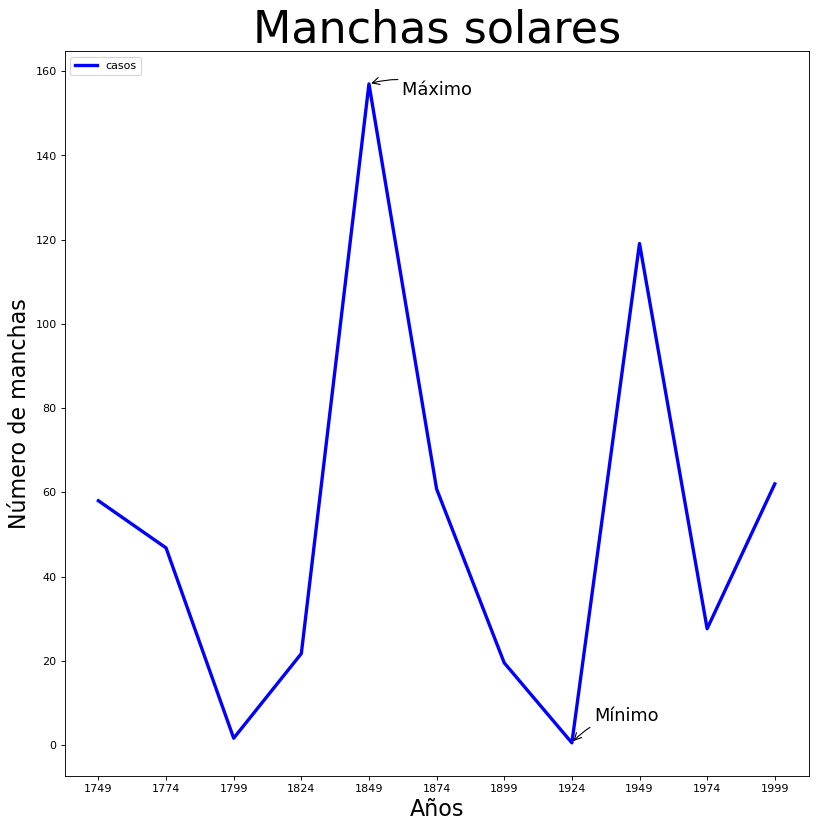

In [25]:
%pylab inline 
import numpy as np
import matplotlib.pyplot as plt


archivo = np.loadtxt('data/sunspots.txt', dtype=float, delimiter='\t')
plt.figure(figsize=(12, 12), dpi=80)

plt.subplot(1, 1, 1)


X = np.arange(1749,2013,25)
X = X.astype(int)
plt.xticks(X)

Y=[]
for i in range(0,len(archivo), 12*25):
    Y.append(archivo[i,1])

plt.plot(X, Y, color="blue", linewidth=3.0, linestyle="-", label="casos")
plt.title("Manchas solares", fontsize=40)
plt.xlabel('Años', fontsize=20)
plt.ylabel('Número de manchas', fontsize=20)

plt.legend(loc='upper left')


xmax= X[np.argmax(Y)]
ymax= max(Y)

xmin=X[np.argmin(Y)]
ymin=min(Y)


plt.annotate(r'Máximo ',
        xy=(xmax, ymax), xycoords='data',
        xytext=(+30, -10), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate(r'Mínimo',
        xy=(xmin, ymin), xycoords='data',
        xytext=(+20, +20), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))




In [16]:
xmin

1924

(b) Calcula el [promedio móvil](http://en.wikipedia.org/wiki/Moving_average). Dibújalo sobre el dibujo original.

Populating the interactive namespace from numpy and matplotlib


Text(20, 20, 'Mínimo')

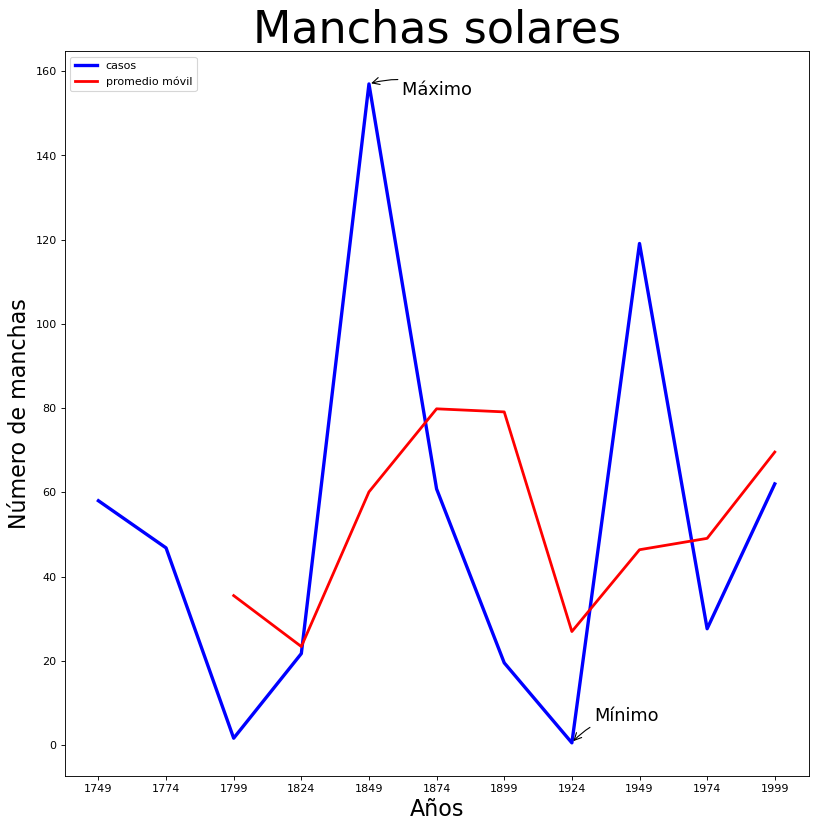

In [28]:
def moving_average(data_set, periods=3):
    weights = np.ones(periods) / periods
    return np.convolve(data_set, weights, mode='valid')


%pylab inline 
import numpy as np
import matplotlib.pyplot as plt


archivo = np.loadtxt('data/sunspots.txt', dtype=float, delimiter='\t')
plt.figure(figsize=(12, 12), dpi=80)

plt.subplot(1, 1, 1)


X = np.arange(1749,2013,25)
X = X.astype(int)
plt.xticks(X)

Y=[]
for i in range(0,len(archivo), 12*25):
    Y.append(archivo[i,1])

plt.plot(X, Y, color="blue", linewidth=3.0, linestyle="-", label="casos")
plt.title("Manchas solares", fontsize=40)
plt.xlabel('Años', fontsize=20)
plt.ylabel('Número de manchas', fontsize=20)

plt.plot(X[2:],moving_average(Y,3),linewidth=2.5, color="red", label="promedio móvil")

plt.legend(loc='upper left')

xmax= X[np.argmax(Y)]
ymax= max(Y)

xmin=X[np.argmin(Y)]
ymin=min(Y)


plt.annotate(r'Máximo ',
        xy=(xmax, ymax), xycoords='data',
        xytext=(+30, -10), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate(r'Mínimo',
        xy=(xmin, ymin), xycoords='data',
        xytext=(+20, +20), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

## Pregunta 6

Utiliza el archivo `starts.txt` (localizado en la carpeta `data`), el cual contiene la temperatura y magnitud de varias estrellas en la Vía Lactea.  Usa esta información para dibujar un **scatter plot** del logaritmo del brillo vs. la temperatura (en **K**). Este diagrama se conoce como diagrama de [Hertzsprung-Russell](http://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram). 

(a) Lee el archivo y dibuja los datos tal como vienen en el archivo. Agrega etiquetas y formatea la gráfica de tal manera que tenga calidad de publicación.

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Temperatura (K)')

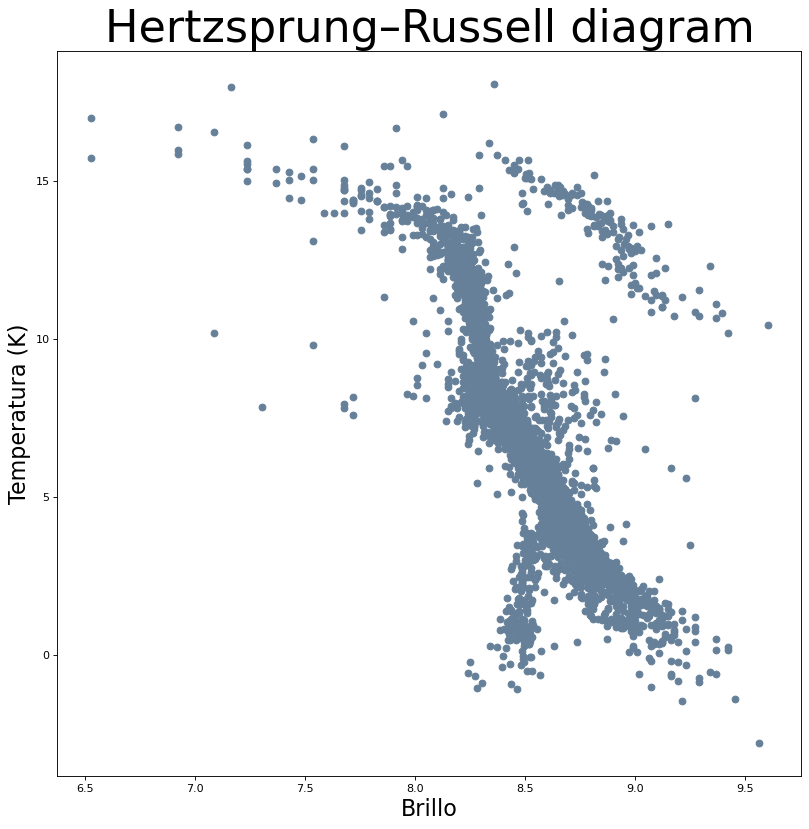

In [122]:
%pylab inline 
import numpy as np
import matplotlib.pyplot as plt


archivo = np.loadtxt('data/stars.txt', dtype=float, delimiter=' ')
plt.figure(figsize=(12, 12), dpi=80)

plt.subplot(1, 1, 1)

X=archivo[:,0]
Y=archivo[:,1]

plt.scatter(np.log(X),Y, color=(.4, .5, .6))

plt.title("Hertzsprung–Russell diagram", fontsize=40)
plt.xlabel('Brillo', fontsize=20)
plt.ylabel('Temperatura (K)', fontsize=20)

(b) Ahora usa el `xlim()` y  `ylim()` para que quede de manera correcta el diagrama. Hay regiones donde las estrellas parece que se aglomeran, ve el archivo de [wikipedia]( http://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) y agrega anotaciones para explicarlas.


Populating the interactive namespace from numpy and matplotlib


Text(60, -10, 'Mayor concentración ')

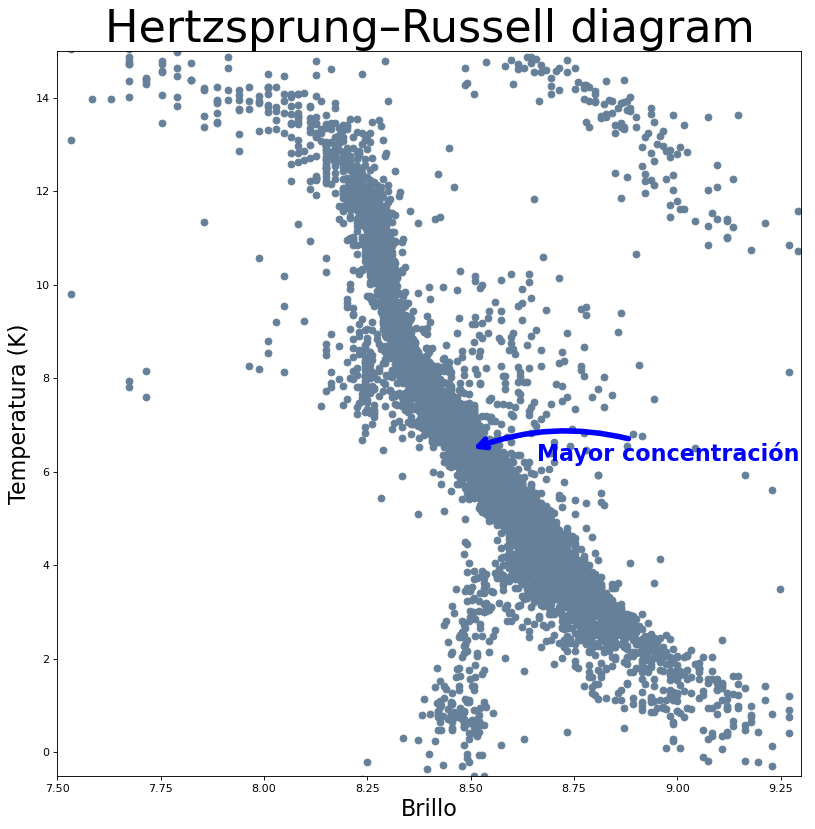

In [54]:
%pylab inline 
import numpy as np
import matplotlib.pyplot as plt


archivo = np.loadtxt('data/stars.txt', dtype=float, delimiter=' ')
plt.figure(figsize=(12, 12), dpi=80)

plt.subplot(1, 1, 1)

X=archivo[:,0]
Y=archivo[:,1]

plt.scatter(np.log(X),Y, color=(.4, .5, .6))

plt.title("Hertzsprung–Russell diagram", fontsize=40)
plt.xlabel('Brillo', fontsize=20)
plt.ylabel('Temperatura (K)', fontsize=20)

plt.xlim(7.5,9.3)
plt.ylim(-.5,15)


xmax= X[np.argmax(mean(Y))]
ymax= mean(Y)


plt.annotate(r'Mayor concentración ',
        xy=(8.5, ymax), xycoords='data',
        xytext=(+60, -10), textcoords='offset points', fontsize=20, color="blue",weight='bold',
            arrowprops=dict(arrowstyle="->",color='blue',linewidth=5,  connectionstyle="arc3,rad=.2"))



In [29]:
np.argmax(mean(Y))

0